In [100]:
import numpy as np
import skfuzzy as fuzzy
import matplotlib
matplotlib.use('GTK3Cairo')
from skfuzzy import control as ctrl

In [101]:
# inputs parameters
market = ctrl.Antecedent(np.arange(0, 101, 1), 'market')
location = ctrl.Antecedent(np.arange(0, 11, 1), 'location')

# output parameter
house = ctrl.Consequent(np.arange(0, 11, 1), 'house')

In [102]:
#setting different ranges of market
market["low"]=fuzzy.trapmf(market.universe,[0,0,8,10])
market["medium"]=fuzzy.trapmf(market.universe,[6,10,18,25])
market["high"]=fuzzy.trapmf(market.universe,[20,25,65,85])
market["very_high"]=fuzzy.trapmf(market.universe,[65,85,100,100])

In [103]:
#setting different ranges of location 
location["bad"]=fuzzy.trapmf(location.universe,[0,0,2,4])
location["fair"]=fuzzy.trapmf(location.universe,[2,5,6,8])
location["excellent"]=fuzzy.trapmf(location.universe,[6,8,10,10])

In [104]:
# setting different ranges for output house
house["very_low"]=fuzzy.trimf(location.universe,[0,0,3])
house["low"]=fuzzy.trimf(location.universe,[0,3,6])
house["medium"]=fuzzy.trimf(location.universe,[2,5,8])
house["high"]=fuzzy.trimf(location.universe,[4,7,10])
house["very_high"]=fuzzy.trimf(location.universe,[7,10,10])

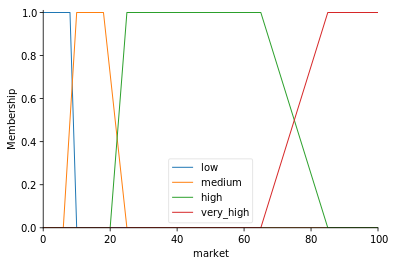

/home/aditya/.local/lib/python3.6/site-packages/matplotlib/backends/backend_gtk3.py:181: Warning: Source ID 43 was not found when attempting to remove it
  GLib.source_remove(self._idle_draw_id)


In [105]:
market.view() # market graph

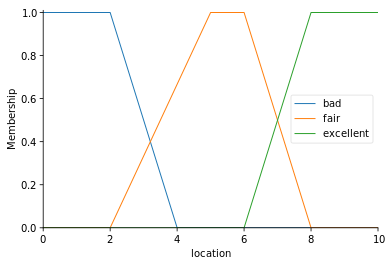

/home/aditya/.local/lib/python3.6/site-packages/matplotlib/backends/backend_gtk3.py:181: Warning: Source ID 45 was not found when attempting to remove it
  GLib.source_remove(self._idle_draw_id)


In [106]:
location.view() #location graph

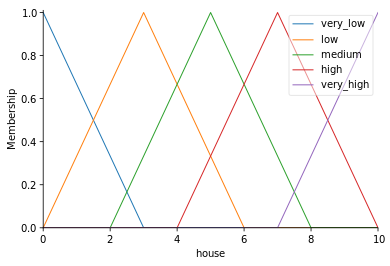

/home/aditya/.local/lib/python3.6/site-packages/matplotlib/backends/backend_gtk3.py:181: Warning: Source ID 47 was not found when attempting to remove it
  GLib.source_remove(self._idle_draw_id)


In [107]:
house.view() # house graph

In [108]:
#setting rules
rule1 = ctrl.Rule( market['low'] , house['very_low'])
rule2 = ctrl.Rule( location['bad'], house['low'])
rule3 = ctrl.Rule( market['low'] | location['bad'], house['very_low'])
rule4 = ctrl.Rule( market['medium'] | location['bad'], house['low'])
rule5 = ctrl.Rule( market['high'] | location['bad'], house['medium'])
rule6 = ctrl.Rule( market['very_high'] | location['bad'], house['high'])
rule7 = ctrl.Rule( market['low'] | location['fair'], house['low'])
rule8 = ctrl.Rule( market['medium'] | location['fair'], house['medium'])
rule9 = ctrl.Rule( market['high'] | location['fair'], house['high'])
rule10 = ctrl.Rule( market['very_high'] | location['fair'], house['very_high'])
rule11 = ctrl.Rule( market['low'] | location['excellent'], house['medium'])
rule12 = ctrl.Rule( market['medium'] | location['excellent'], house['high'])
rule13 = ctrl.Rule( market['high'] | location['excellent'], house['very_high'])
rule14 = ctrl.Rule( market['very_high'] | location['excellent'], house['very_high'])

In [109]:
house_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, 
                                 rule8, rule9, rule10, rule11, rule12, rule13, rule14])

In [110]:
calculate = ctrl.ControlSystemSimulation(house_ctrl)

In [112]:
calculate.input["market"]=float(input("enter market price"))
calculate.input["location"]=float(input("enter location"))

calculate.compute()

enter market price125
enter location11


In [113]:
calculate.output["house"]

6.515151515151516

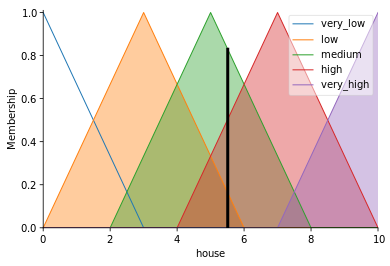

/home/aditya/.local/lib/python3.6/site-packages/matplotlib/backends/backend_gtk3.py:181: Warning: Source ID 41 was not found when attempting to remove it
  GLib.source_remove(self._idle_draw_id)


In [99]:
house.view(sim=calculate)